# Deep Q-Network (DQN)
---
In this notebook, you will implement a DQN agent with OpenAI Gym's CartPole-v1 environment.
```
Description:
        A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The pendulum starts upright, and the goal is to prevent it from falling over by increasing and reducing the cart's velocity.
Source:
        This environment corresponds to the version of the cart-pole problem described by Barto, Sutton, and Anderson
Observation: 
        Type: Box(4)
        Num	Observation                 Min         Max
        0	Cart Position             -4.8            4.8
        1	Cart Velocity             -Inf            Inf
        2	Pole Angle                 -24°           24°
        3	Pole Velocity At Tip      -Inf            Inf
        
Actions:
        Type: Discrete(2)
        Num	Action
        0	Push cart to the left
        1	Push cart to the right
        
        Note: The amount the velocity is reduced or increased is not fixed as it depends on the angle the pole is pointing. This is because the center of gravity of the pole increases the amount of energy needed to move the cart underneath it
        
Reward:
        Reward is 1 for every step taken, including the termination step
Starting State:
        All observations are assigned a uniform random value between ±0.05
Episode Termination:
        Pole Angle is more than ±12°
        Cart Position is more than ±2.4 (center of the cart reaches the edge of the display)
        Episode length is greater than 200
        Solved Requirements
        Considered solved when the average reward is greater than or equal to 195.0 over 100 consecutive trials.
        ```
### 1. Import the Necessary Packages

In [1]:
import gym
import sys
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Instantiate the Environment and Agent

Initialize the environment in the code cell below.

In [2]:
env = gym.make('CartPole-v1')
env.seed(0)
print('State shape: ', env.observation_space.shape)
print('Number of actions: ', env.action_space.n)

('State shape: ', (4,))
('Number of actions: ', 2)


Before running the next code cell, familiarize yourself with the code in **Step 2** and **Step 3** of this notebook, along with the code in `dqn_agent.py` and `model.py`.  Once you have an understanding of how the different files work together, 
- Define a neural network architecture in `model.py` that maps states to action values.  This file is mostly empty - it's up to you to define your own deep Q-network!
- Finish the `learn` method in the `Agent` class in `dqn_agent.py`.  The sampled batch of experience tuples is already provided for you; you need only use the local and target Q-networks to compute the loss, before taking a step towards minimizing the loss.

Once you have completed the code in `dqn_agent.py` and `model.py`, run the code cell below.  (_If you end up needing to make multiple changes and get unexpected behavior, please restart the kernel and run the cells from the beginning of the notebook!_)

You can find the solution files, along with saved model weights for a trained agent, in the `solution/` folder.  (_Note that there are many ways to solve this exercise, and the "solution" is just one way of approaching the problem, to yield a trained agent._)

In [3]:
from dqn_agent import Agent

agent = Agent(state_size=4, action_size=2, seed=0)

# watch an untrained agent
state = env.reset()
for j in range(200):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### 3. Train the Agent with DQN

Run the code cell below to train the agent from scratch.  You are welcome to amend the supplied values of the parameters in the function, to try to see if you can get better performance!

Episode 1	Average Score: 18.00
Episode 2	Average Score: 19.00
Episode 3	Average Score: 17.00
Episode 4	Average Score: 23.50
Episode 5	Average Score: 22.80
Episode 6	Average Score: 21.83
Episode 7	Average Score: 21.14
Episode 8	Average Score: 21.75
Episode 9	Average Score: 23.00
Episode 10	Average Score: 21.60
Episode 11	Average Score: 23.55
Episode 12	Average Score: 22.83
Episode 13	Average Score: 22.77
Episode 14	Average Score: 22.29
Episode 15	Average Score: 24.33
Episode 16	Average Score: 23.44
Episode 17	Average Score: 24.18
Episode 18	Average Score: 23.78
Episode 19	Average Score: 23.37
Episode 20	Average Score: 23.40
Episode 21	Average Score: 24.10
Episode 22	Average Score: 23.59
Episode 23	Average Score: 23.35
Episode 24	Average Score: 23.67
Episode 25	Average Score: 24.24
Episode 26	Average Score: 23.96
Episode 27	Average Score: 23.67
Episode 28	Average Score: 23.50
Episode 29	Average Score: 23.10
Episode 30	Average Score: 23.00
Episode 31	Average Score: 23.23
Episode 32	Averag

Episode 253	Average Score: 11.61
Episode 254	Average Score: 11.60
Episode 255	Average Score: 11.58
Episode 256	Average Score: 11.58
Episode 257	Average Score: 11.57
Episode 258	Average Score: 11.51
Episode 259	Average Score: 11.51
Episode 260	Average Score: 11.45
Episode 261	Average Score: 11.45
Episode 262	Average Score: 11.43
Episode 263	Average Score: 11.44
Episode 264	Average Score: 11.43
Episode 265	Average Score: 11.43
Episode 266	Average Score: 11.44
Episode 267	Average Score: 11.43
Episode 268	Average Score: 11.46
Episode 269	Average Score: 11.47
Episode 270	Average Score: 11.39
Episode 271	Average Score: 11.27
Episode 272	Average Score: 11.29
Episode 273	Average Score: 11.21
Episode 274	Average Score: 11.10
Episode 275	Average Score: 11.09
Episode 276	Average Score: 11.02
Episode 277	Average Score: 11.04
Episode 278	Average Score: 11.05
Episode 279	Average Score: 11.07
Episode 280	Average Score: 11.08
Episode 281	Average Score: 11.07
Episode 282	Average Score: 11.06
Episode 28

Episode 503	Average Score: 9.87
Episode 504	Average Score: 9.87
Episode 505	Average Score: 9.85
Episode 506	Average Score: 9.85
Episode 507	Average Score: 9.84
Episode 508	Average Score: 9.81
Episode 509	Average Score: 9.80
Episode 510	Average Score: 9.81
Episode 511	Average Score: 9.81
Episode 512	Average Score: 9.81
Episode 513	Average Score: 9.80
Episode 514	Average Score: 9.82
Episode 515	Average Score: 9.83
Episode 516	Average Score: 9.84
Episode 517	Average Score: 9.84
Episode 518	Average Score: 9.82
Episode 519	Average Score: 9.81
Episode 520	Average Score: 9.78
Episode 521	Average Score: 9.77
Episode 522	Average Score: 9.78
Episode 523	Average Score: 9.80
Episode 524	Average Score: 9.81
Episode 525	Average Score: 9.80
Episode 526	Average Score: 9.79
Episode 527	Average Score: 9.81
Episode 528	Average Score: 9.82
Episode 529	Average Score: 9.81
Episode 530	Average Score: 9.80
Episode 531	Average Score: 9.76
Episode 532	Average Score: 9.79
Episode 533	Average Score: 9.77
Episode 

Episode 754	Average Score: 12.48
Episode 755	Average Score: 12.45
Episode 756	Average Score: 12.46
Episode 757	Average Score: 12.71
Episode 758	Average Score: 12.74
Episode 759	Average Score: 12.78
Episode 760	Average Score: 12.76
Episode 761	Average Score: 12.63
Episode 762	Average Score: 12.77
Episode 763	Average Score: 12.93
Episode 764	Average Score: 13.06
Episode 765	Average Score: 13.04
Episode 766	Average Score: 13.04
Episode 767	Average Score: 13.07
Episode 768	Average Score: 13.04
Episode 769	Average Score: 13.06
Episode 770	Average Score: 13.05
Episode 771	Average Score: 13.06
Episode 772	Average Score: 13.07
Episode 773	Average Score: 13.12
Episode 774	Average Score: 13.14
Episode 775	Average Score: 13.14
Episode 776	Average Score: 13.33
Episode 777	Average Score: 13.34
Episode 778	Average Score: 13.30
Episode 779	Average Score: 13.30
Episode 780	Average Score: 13.29
Episode 781	Average Score: 13.28
Episode 782	Average Score: 13.09
Episode 783	Average Score: 13.01
Episode 78

Episode 1002	Average Score: 146.54
Episode 1003	Average Score: 147.04
Episode 1004	Average Score: 148.03
Episode 1005	Average Score: 148.24
Episode 1006	Average Score: 148.90
Episode 1007	Average Score: 149.81
Episode 1008	Average Score: 150.59
Episode 1009	Average Score: 151.90
Episode 1010	Average Score: 153.40
Episode 1011	Average Score: 154.70
Episode 1012	Average Score: 155.51
Episode 1013	Average Score: 156.43
Episode 1014	Average Score: 157.31
Episode 1015	Average Score: 158.59
Episode 1016	Average Score: 159.65
Episode 1017	Average Score: 161.15
Episode 1018	Average Score: 162.27
Episode 1019	Average Score: 163.37
Episode 1020	Average Score: 164.56
Episode 1021	Average Score: 165.65
Episode 1022	Average Score: 166.58
Episode 1023	Average Score: 167.73
Episode 1024	Average Score: 168.74
Episode 1025	Average Score: 169.45
Episode 1026	Average Score: 169.99
Episode 1027	Average Score: 170.16
Episode 1028	Average Score: 170.67
Episode 1029	Average Score: 171.55
Episode 1030	Average

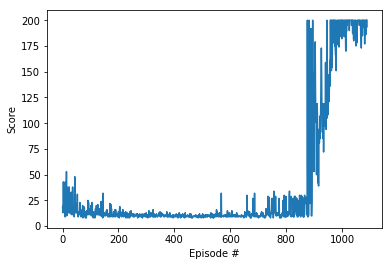

In [4]:
def dqn(n_episodes=2000, max_t=200, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        state = env.reset()
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            next_state, reward, done, _ = env.step(action)
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        sys.stdout.flush()
            
        if np.mean(scores_window)>=195.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### 4. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [5]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

for i in range(5):
    state = env.reset()
    for j in range(200):
        action = agent.act(state)
        state, reward, done, _ = env.step(action)
        if done:
            break 
            
env.close()

### 5. Explore

In this exercise, you have implemented a DQN agent and demonstrated how to use it to solve an OpenAI Gym environment.  To continue your learning, you are encouraged to complete any (or all!) of the following tasks:
- Amend the various hyperparameters and network architecture to see if you can get your agent to solve the environment faster.  Once you build intuition for the hyperparameters that work well with this environment, try solving a different OpenAI Gym task with discrete actions!
- You may like to implement some improvements such as prioritized experience replay, Double DQN, or Dueling DQN! 
- Write a blog post explaining the intuition behind the DQN algorithm and demonstrating how to use it to solve an RL environment of your choosing.  